In [103]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
pd.set_option('display.max_colwidth',1000)

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


In [104]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
rates = pd.read_csv('rates.csv', index_col=0, skiprows=0).T.to_dict()

In [105]:
# Replace price with price per passenger
df_train['price'] = df_train['price'] / df_train['number_of_passengers']
df_train['price'] = (df_train.apply(lambda x: (rates[x['currency']]['rate'] * x['price']), axis=1)).round(2)

In [106]:
# Outliers
df_train.sort_values(by = 'price', ascending = False)[:3]
df_train = df_train.drop(df_train[df_train['id'] == 51950].index)
df_train = df_train.drop(df_train[df_train['id'] == 85045].index)
df_train = df_train.drop(df_train[df_train['id'] == 89623].index)
df_train = df_train.drop(df_train[df_train['id'] == 57157].index)
df_train = df_train.drop(df_train[df_train['id'] == 56666].index)
df_train = df_train.drop(df_train[df_train['id'] == 77202].index)
df_train = df_train.drop(df_train[df_train['id'] == 19741].index)

In [107]:
# Concat origin, departure
# Concat origin and destinaiton
df_train['origin_destination'] = df_train['origin'] + '-' + df_train['destination']
df_test['origin_destination'] = df_test['origin'] + '-' + df_test['destination']

In [108]:
missing_date = df_test[~df_test.departure_date.isin(df_train.departure_date.values)].departure_date

In [109]:
df_train['departure_date'] = pd.to_datetime(df_train['departure_date'],format="%Y%m%d").dt.normalize()
df_test['departure_date'] = pd.to_datetime(df_test['departure_date'],format="%Y%m%d").dt.normalize()

In [110]:
df_train['week'] = df_train['departure_date'].dt.week
df_test['week'] = df_test['departure_date'].dt.week

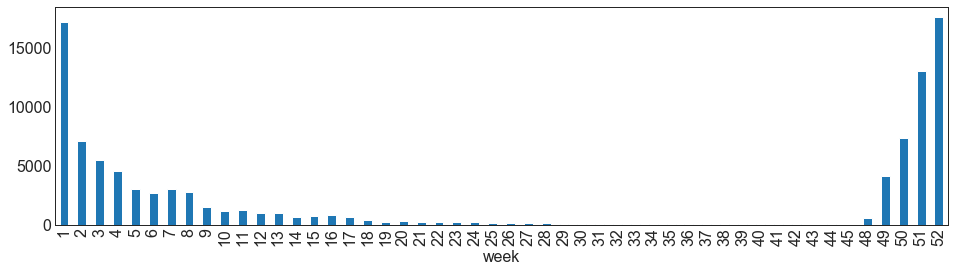

In [111]:
df_train['departure_date'].groupby(df_train["week"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(16,4))

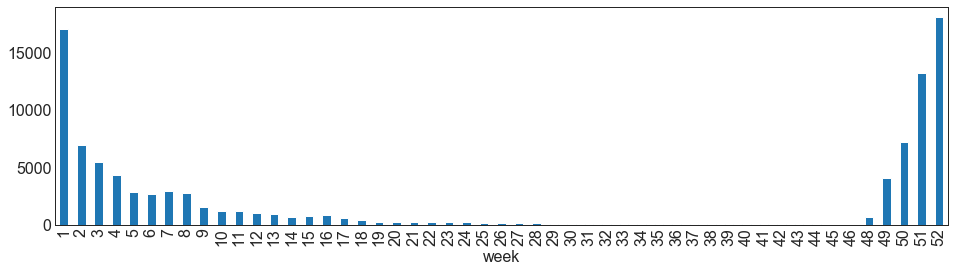

In [112]:
df_test['departure_date'].groupby(df_test["week"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(16,4))

In [113]:
print(df_test["week"].value_counts().sort_index())

1     17120
2      6958
3      5472
4      4365
5      2860
6      2638
7      2931
8      2734
9      1513
10     1211
11     1194
12     1026
13      949
14      648
15      709
16      843
17      552
18      418
19      214
20      251
21      262
22      241
23      222
24      180
25      162
26      145
27      119
28      120
29       84
30       82
31       86
32       55
33       55
34       33
35       16
36       19
37        7
38       37
39       17
40       19
41       39
42        5
43        5
44        8
45        3
46        1
48      633
49     4052
50     7250
51    13295
52    18142
Name: week, dtype: int64


In [114]:
print(df_train["week"].value_counts().sort_index())

1     17150
2      7116
3      5513
4      4525
5      2994
6      2659
7      3025
8      2786
9      1522
10     1190
11     1209
12      998
13      957
14      614
15      722
16      844
17      603
18      389
19      257
20      296
21      250
22      255
23      218
24      211
25      157
26      157
27      141
28      135
29       88
30       71
31       68
32       74
33       52
34       42
35       18
36       26
37       11
38       25
39       17
40       18
41       32
42        5
43        4
44        6
45        3
48      551
49     4093
50     7311
51    13014
52    17571
Name: week, dtype: int64


In [115]:
missing_weeks = df_test[~df_test.week.isin(df_train.week.values)].week
missing_weeks

75186    46
Name: week, dtype: int64

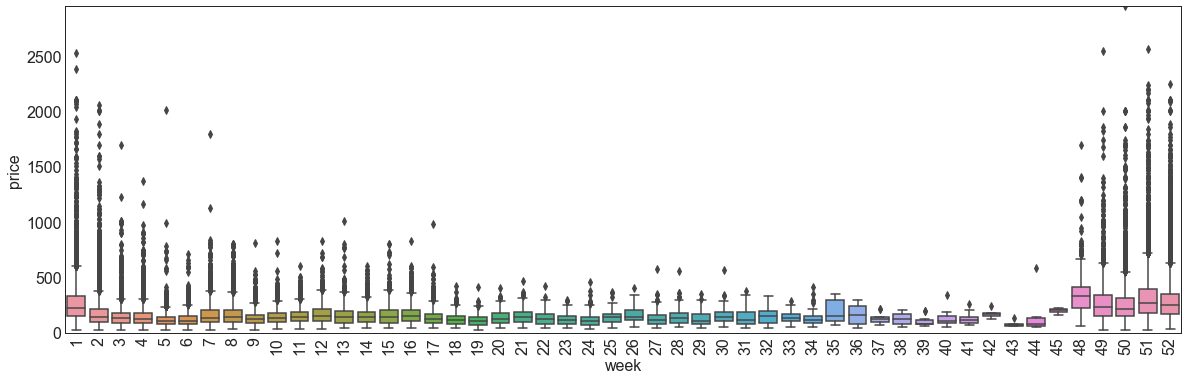

In [117]:
# scatter plot departure_time/price
var = 'week'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.axis(ymin=0, ymax=df_train['price'].max());

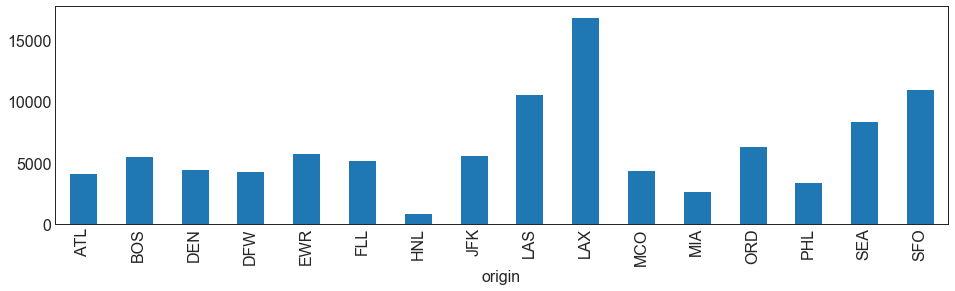

In [118]:
df_train['origin'].groupby(df_train["origin"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(16,4))

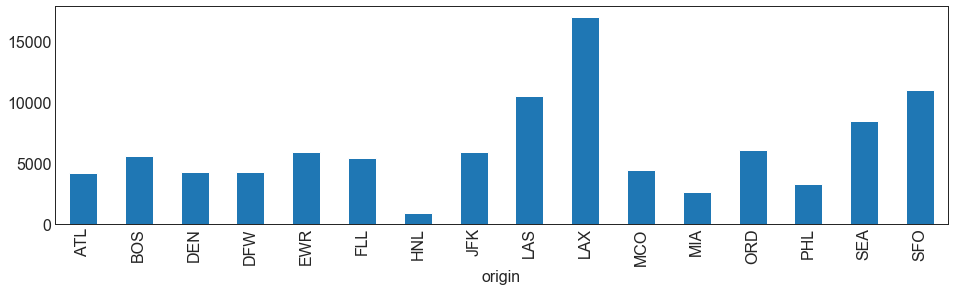

In [119]:
df_test['origin'].groupby(df_test["origin"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(16,4))

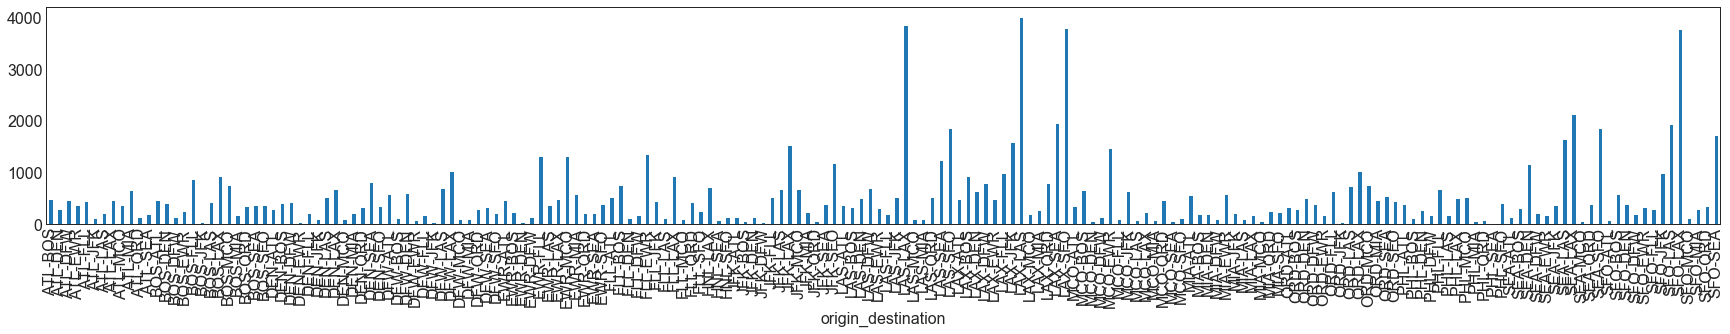

In [120]:
df_train['origin_destination'].groupby(df_train["origin_destination"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(30,4))

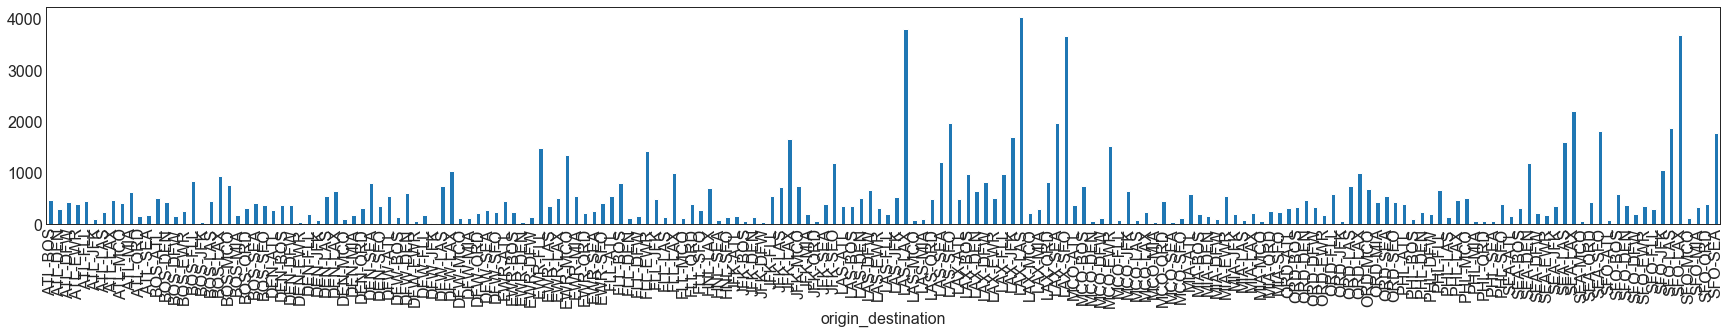

In [121]:
df_test['origin_destination'].groupby(df_test["origin_destination"]).count().plot(kind="bar",
                                                                            rot=90,
                                                                            figsize=(30,4))

In [122]:
df_train['origin_destination'].groupby(df_test["origin_destination"]).count().sort_values()

origin_destination
DFW-JFK      28
EWR-DEN      37
JFK-DFW      40
BOS-JFK      44
MCO-SEA      47
DEN-EWR      49
MCO-MIA      49
PHL-SEA      52
JFK-ORD      53
SEA-MCO      54
ORD-JFK      56
MCO-DEN      56
PHL-MIA      61
PHL-ORD      62
MIA-MCO      64
DFW-EWR      66
JFK-BOS      67
MCO-LAS      72
LAS-MCO      74
SFO-ATL      74
MCO-FLL      77
HNL-SEA      80
MIA-LAS      81
DEN-JFK      81
DEN-MCO      91
ATL-JFK      97
MIA-DFW      98
LAS-MIA     100
PHL-BOS     104
DFW-MIA     108
           ... 
LAX-ORD     810
LAX-DFW     817
BOS-FLL     839
BOS-LAX     928
LAX-BOS     971
LAX-FLL     978
FLL-LAX     984
ORD-LAX     999
DFW-LAX    1024
SFO-JFK    1046
SEA-DEN    1181
JFK-SFO    1183
LAS-SEA    1214
EWR-MCO    1344
FLL-EWR    1423
EWR-FLL    1483
MCO-EWR    1513
SEA-LAS    1599
JFK-LAX    1661
LAX-JFK    1691
SFO-SEA    1770
SEA-SFO    1809
SFO-LAS    1860
LAX-SEA    1966
LAS-SFO    1971
SEA-LAX    2207
LAX-SFO    3664
SFO-LAX    3677
LAS-LAX    3801
LAX-LAS    4030
Name:

In [123]:
df_train[df_train['origin_destination'] == 'DFW-JFK']

id  search_date origin destination  distance departure_date  \
625      626     20181202    DFW         JFK      2235     2018-12-22   
2057    2058     20181231    DFW         JFK      2235     2018-12-31   
4277    4278     20181231    DFW         JFK      2235     2019-03-19   
6775    6776     20181229    DFW         JFK      2235     2019-01-04   
9727    9728     20181210    DFW         JFK      2235     2018-12-14   
10118  10119     20181218    DFW         JFK      2235     2019-01-13   
18461  18462     20181218    DFW         JFK      2235     2018-12-19   
20363  20364     20181205    DFW         JFK      2235     2019-01-26   
20889  20890     20181201    DFW         JFK      2235     2018-12-12   
26693  26694     20181201    DFW         JFK      2235     2018-12-10   
27768  27769     20181216    DFW         JFK      2235     2018-12-30   
34676  34677     20181217    DFW         JFK      2235     2018-12-29   
37145  37146     20181211    DFW         JFK      2235     2018-12-12   
38758  38759     20181205    DFW         JFK      2235     2019-01-01   
42885  42886     20181214    DFW         JFK      2235     2018-12-24   
44758  44759     20181225    DFW         JFK      2235     2018-12-30   
46935  46936     20181211    DFW         JFK      2235     2018-12-23   
49197  49198     20181211    DFW         JFK      2235     2018-12-23   
49251  49252     20181211    DFW         JFK      2235     2018-12-28   
52095  52096     20181225    DFW         JFK      2235     2019-02-14   
53476  53477     20181231    DFW         JFK      2235     2019-01-03   
55216  55217     20181216    DFW         JFK      2235     2018-12-30   
56538  56539     20181205    DFW         JFK      2235     2018-12-10   
58237  58238     20181204    DFW         JFK      2235     2019-03-10   
60015  60016     20181213    DFW         JFK      2235     2019-01-14   
61546  61547     20181201    DFW         JFK      2235     2019-01-04   
64464  64465     20181210    DFW         JFK      2235     2019-02-24   
64635  64636     20181201    DFW         JFK      2235     2018-12-10   
67661  67662     20181212    DFW         JFK      2235     2018-12-26   
68280  68281     20181216    DFW         JFK      2235     2019-03-15   
69170  69171     20181213    DFW         JFK      2235     2019-01-06   
69423  69424     20181220    DFW         JFK      2235     2018-12-29   
77386  77387     20181224    DFW         JFK      2235     2018-12-29   
78589  78590     20181211    DFW         JFK      2235     2018-12-30   
86281  86282     20181202    DFW         JFK      2235     2018-12-22   
88623  88624     20181225    DFW         JFK      2235     2019-02-14   
96941  96942     20181204    DFW         JFK      2235     2019-03-10   
98771  98772     20181216    DFW         JFK      2235     2018-12-21   
98938  98939     20181209    DFW         JFK      2235     2019-01-09   

       departure_time departure_day_of_week  advance_purchase    eft carrier  \
625               705                   Sat                20  3.483      AA   
2057             1830                   Mon                 0  3.500      AA   
4277              700                   Tue                78  3.567      AA   
6775             1830                   Fri                 6  3.500      AA   
9727             1030                   Fri                 4  3.400      AA   
10118            1021                   Sun                26  3.417      AA   
18461            1019                   Wed                 1  3.383      AA   
20363            1826                   Sat                52  3.550      AA   
20889            1030                   Wed                11  3.400      AA   
26693            1030                   Mon                 9  3.400      AA   
27768            1830                   Sun                14  3.500      AA   
34676             705                   Sat                12  3.483      AA   
37145            1030                   Wed      

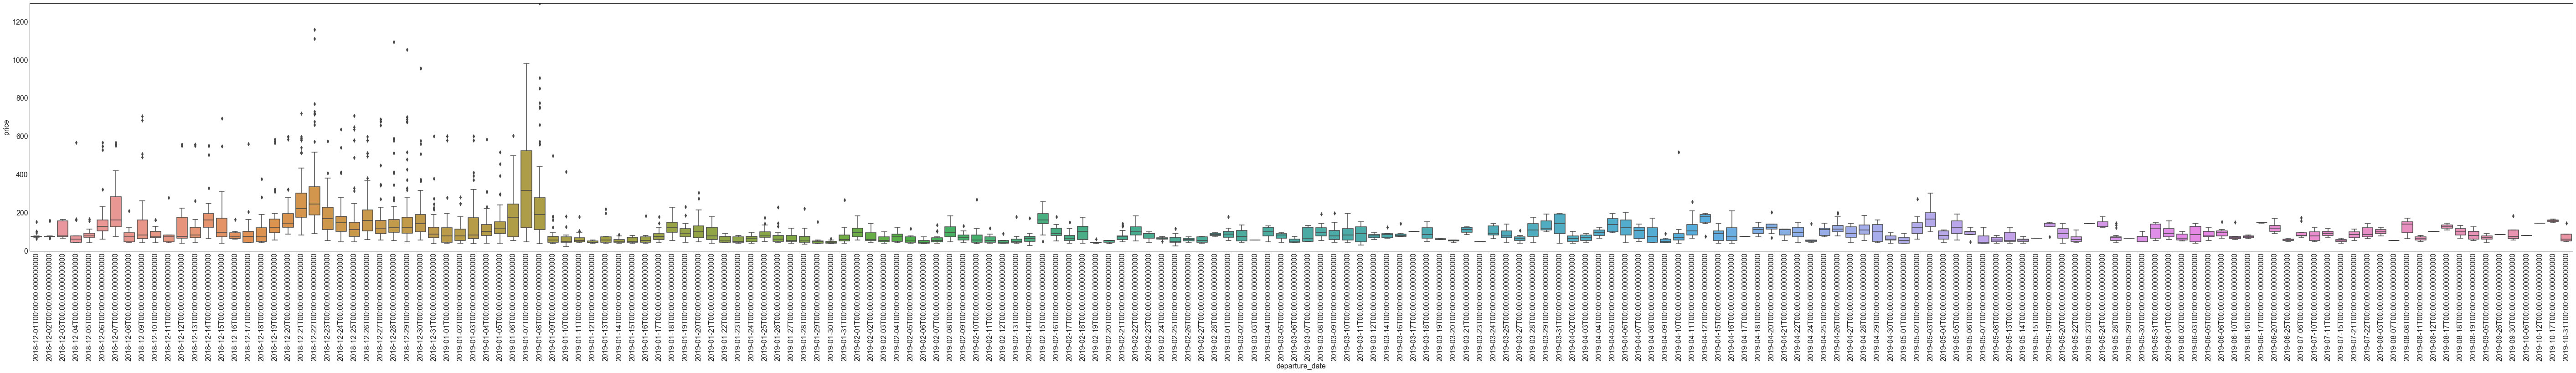

In [133]:
# scatter plot departure_time/price
var = 'departure_date'
df_temp = df_train[df_train['origin_destination'] == 'LAX-LAS']
data = pd.concat([df_temp['price'], df_temp[var]], axis=1)
f, ax = plt.subplots(figsize=(100, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.axis(ymin=0, ymax=df_temp['price'].max());

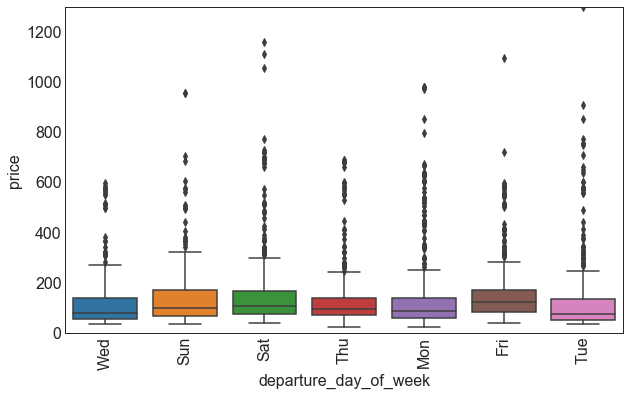

In [131]:
# scatter plot departure_time/price
var = 'departure_day_of_week'
df_temp = df_train[df_train['origin_destination'] == 'LAX-LAS']
data = pd.concat([df_temp['price'], df_temp[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.axis(ymin=0, ymax=df_temp['price'].max());